<a href="https://colab.research.google.com/github/n-aghaebrahim/Probability-stats-for-AI/blob/final/EDA_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import norm
from matplotlib import gridspec
import statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import requests
import io
%matplotlib inline
import pandas_profiling as pp


import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1ay12Z35-4MUMy7eGSOSG2PbocIrXSZND'}) # replace the id with id of file you want to access
downloaded.GetContentFile('wine_df.csv')



# Data Preprocessing

In [ ]:
wine_df = pd.read_csv('wine_df.csv',sep=',')
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Red0_White1  quality  
0      9.4            0        5  
1      9.8            0        5  
2      9.8            0        5  
3      9.8            0        6  
4      9.4            0        5

## Add Wine Categorization to column

In [ ]:
#Create Wine category column for red = 0 & white = 1
red_wine['Red0_White1'] = 0

# shift column 'Name' to first position
last_column = red_wine.pop('quality')
  
# insert column using insert(position,column_name,
# first_column) function
red_wine.insert(12, 'quality', last_column)
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Red0_White1  quality  
0      9.4            0        5  
1      9.8            0        5  
2      9.8            0        5  
3      9.8            0        6  
4      9.4            0        5

In [ ]:
#Create Wine category column for red = 0 & white = 1
white_wine['Red0_White1'] = 1

# shift column 'Name' to first position
last_column = white_wine.pop('quality')
  
# insert column using insert(position,column_name,
# first_column) function
white_wine.insert(12, 'quality', last_column)
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  Red0_White1  quality  
0      8.8            1        6  
1      9.5            1        6  
2     10.1            1        6  
3      9.9            1        6  
4      9.9            1        6

In [ ]:
# Combine Dataframes together
frames = [red_wine, white_wine]

wine_df = pd.concat(frames)
print(wine_df.shape)
wine_df.sample(5)


(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1431            7.6              0.43         0.31             2.1      0.069   
1478            7.9              0.22         0.24             4.6      0.044   
1049            9.3              0.50         0.36             1.8      0.084   
3660            5.8              0.32         0.28             4.3      0.032   
1227            9.0              0.58         0.25             2.0      0.104   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1431                 13.0                  74.0  0.99580  3.26       0.54   
1478                 39.0                 159.0  0.99270  2.99       0.28   
1049                  6.0                  17.0  0.99704  3.27       0.77   
3660                 46.0                 115.0  0.98946  3.16       0.57   
1227                  8.0                  21.0  0.99769  3.27       0.72   

      alcohol  Red0_White1  quality  
1431      9.9            0        6  
1478     11.5            1        6  
1049     10.8            0        6  
3660     13.0            1        8  
1227      9.6            0        5

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Red0_White1', 'quality'],
      dtype='object')

# EDA

<AxesSubplot:title={'center':'Wine Correlation Heatmap'}>

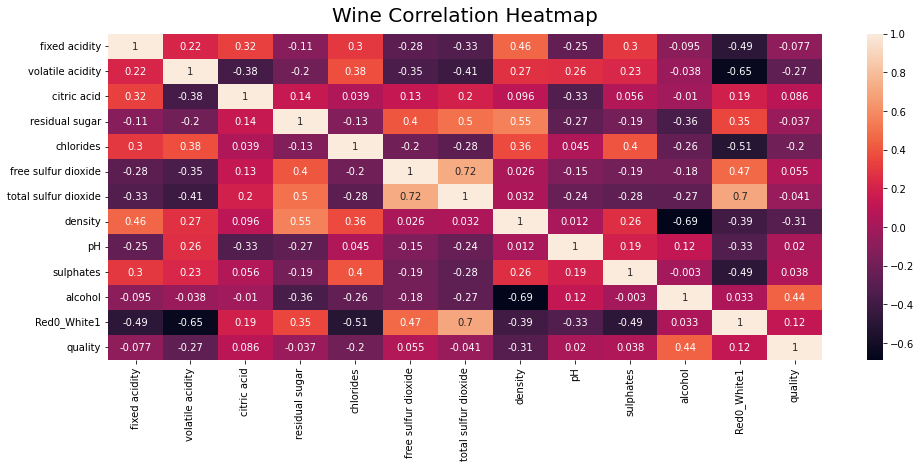

In [ ]:
# Wine Correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(wine_df.corr(),annot=True)
heatmap.set_title('Wine Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
heatmap

In [ ]:
wine_df.plot(kind='box',subplots=True,layout=(4,4),grid=True,figsize=(16,16))
plt.tight_layout()
plt.show()

wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  Red0_White1      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     0.753886     5.818378  
std       0.160787     0.148806     1.192712     0.430779     0.873255  
min       2.720000     0.220000     8.000000     0.000000     3.000000  
25%       3.110000     0.430000     9.500000     1.000000     5.000000  
50%       3.210000     0.510000    10.300000     1.000000     6.000000  
75%       3.320000     0.600000    11.300000     1.000000     6.000000  
max       4.010000     2.000000    14.900000     1.000000     9.000000

In [ ]:
def scatter_plot_by_target(dataframe, target):
    """
    Creates a scatter plot for each variable in the given DataFrame against the target variable,
    using subplots to display each plot in a separate figure.
    
    Parameters:
    dataframe (pandas.DataFrame): The DataFrame to create scatter plots for.
    target (str): The name of the target variable.
    
    Returns:
    None
    """
    num_cols = 4
    num_vars = len(dataframe.columns) - 1
    num_rows = (num_vars + num_cols - 1) // num_cols

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))
    axs = axs.flatten()
    for i, column in enumerate(dataframe.columns):
        if column != target:
            axs[i].scatter(dataframe[column], dataframe[target])
            #axs[i].set_xlabel(column)
            #axs[i].set_ylabel(target)
            axs[i].set_title(f"{column} vs {target}",)
            axs[i].spines['top'].set_visible(False)
            axs[i].spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

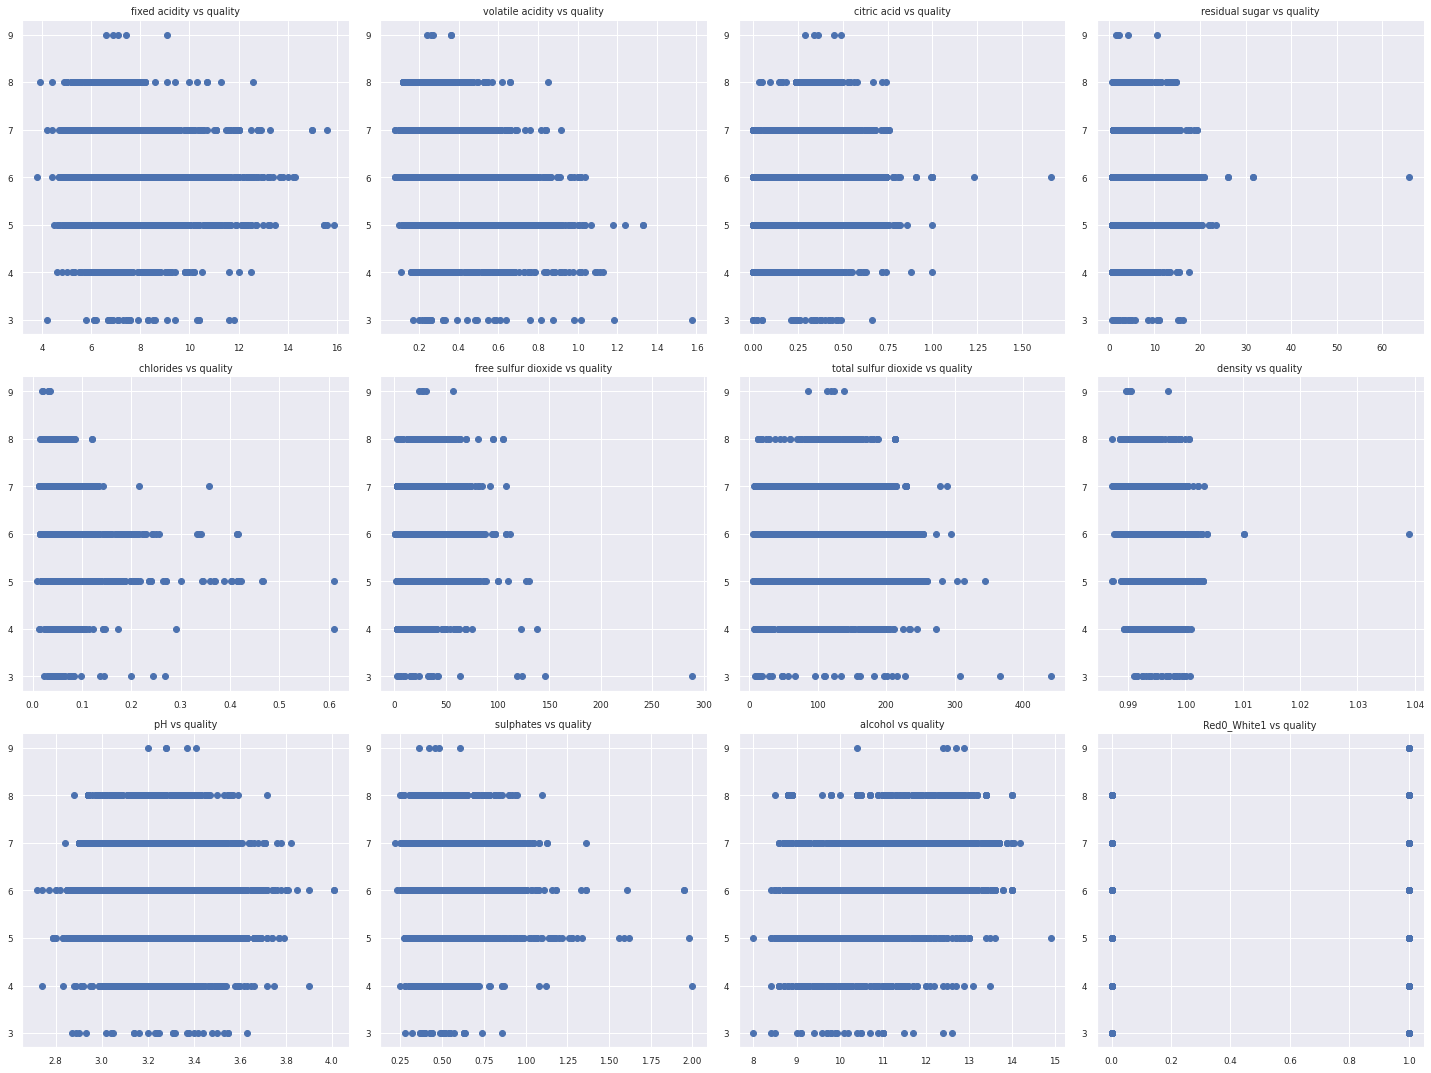

In [ ]:
scatter_plot_by_target(wine_df, 'quality')

In [ ]:
def plot_histograms(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 3
    fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(25, 5*num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        axes[i].hist(df[col], bins=20)
        axes[i].set_title(col)

    # Remove any unused subplots
    if num_cols < len(axes):
        for ax in axes[num_cols:]:
            ax.remove()

    plt.tight_layout()
    plt.show()

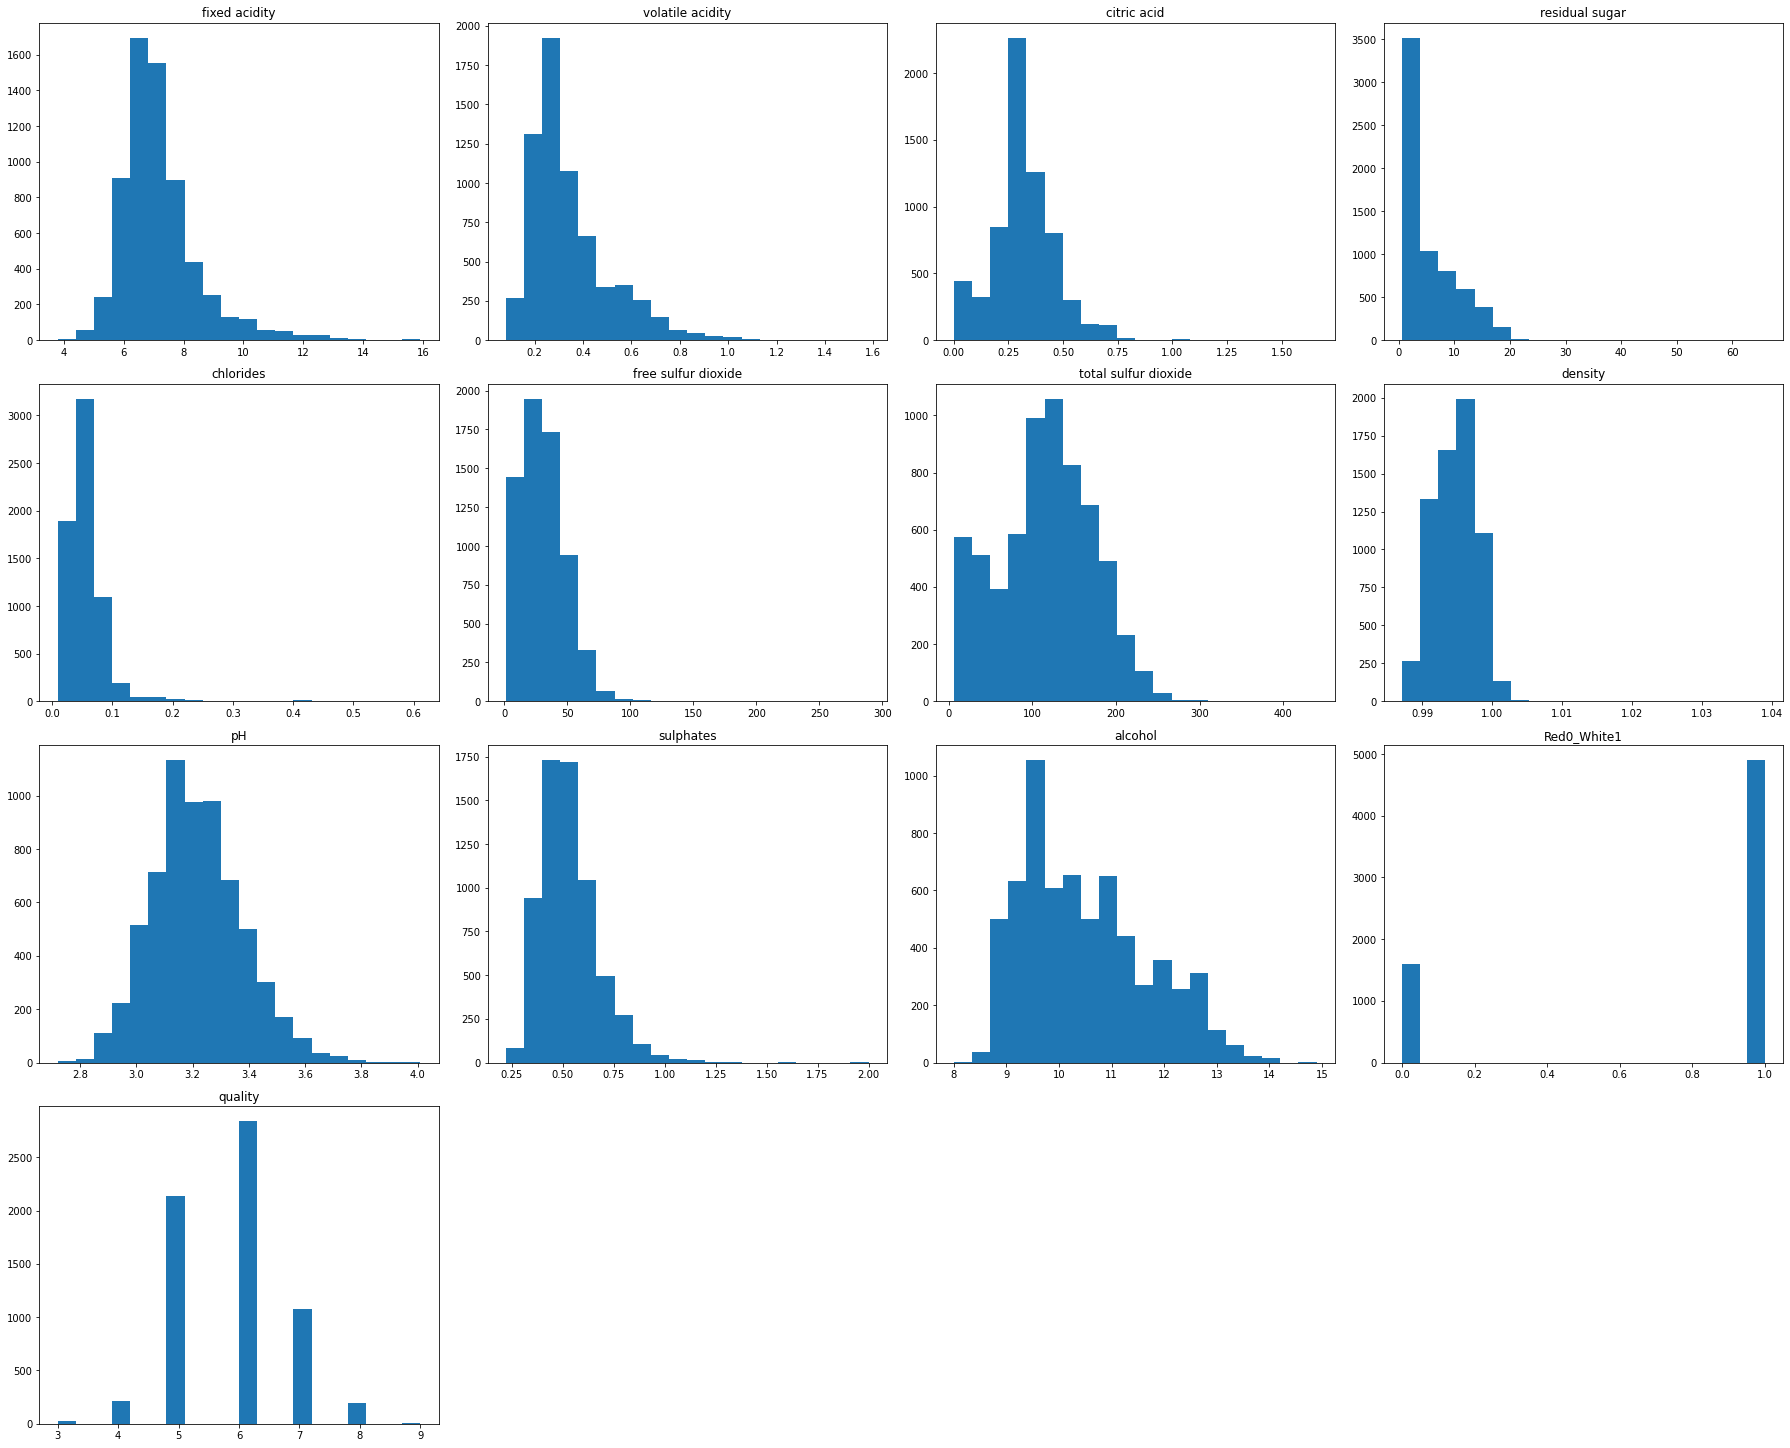

In [ ]:
plot_histograms(wine_df)

In [ ]:
from scipy.stats import ttest_ind

def ttest(df):
    # Get the numeric columns in the DataFrame
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Perform a t-test for each numeric column
    last_col = numeric_cols[-1]
    for col in numeric_cols[:-1]:
        t_stat, p_value = ttest_ind(df[col], df[last_col])
        print(f"Variable: {col}\nT-statistic: {round(t_stat,2)}\nP-value: {round(p_value,4)}\n")


<AxesSubplot:xlabel='quality', ylabel='count'>

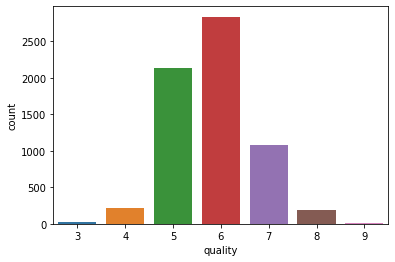

In [ ]:
sns.countplot(wine_df['quality'])

In [ ]:

def perform_eda(df):
    """
    A function that performs Exploratory Data Analysis on a given pandas DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to perform EDA on.
    
    Returns:
    None
    """
    # print the first 5 rows of the data
    print("First 5 rows:")
    print(df.head())
    print("\n")

    # print the shape of the data
    print("Data Shape:", df.shape)
    print("\n")

    # print the data types of each column
    print("Data Types:")
    print(df.dtypes)
    print("\n")

    # print the summary statistics of the numerical columns
    print("Summary Statistics:")
    print(df.describe())
    print("\n")

    # print the number of missing values in each column
    print("Missing Values:")
    print(df.isnull().sum())
    print("\n")




In [ ]:
perform_eda(wine_df)

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Red0_White1  quality  
0      9.4            0        5  
1 

In [ ]:
def explore_data(df):
    """
    Create plots to explore the given DataFrame.
    """
    
    # Plot histogram of all numerical columns
    num_cols = df.select_dtypes(include=['float', 'int']).columns
    num_cols_count = len(num_cols)
    fig, axs = plt.subplots(num_cols_count, 1, figsize=(8, 4*num_cols_count))
    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axs[i])
        axs[i].set_xlabel(col)
    
    plt.show()
    
    # Plot correlation matrix
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.matshow(corr)
    ax.set_xticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticks(range(len(corr.columns)))
    ax.set_yticklabels(corr.columns)
    fig.colorbar(im)
    plt.show()
    
    # Plot pairplot of all numerical columns
    sns.set(font_scale=0.8)
    sns.pairplot(df.select_dtypes(include=['float', 'int']))
    plt.show()


    
    plt.show()

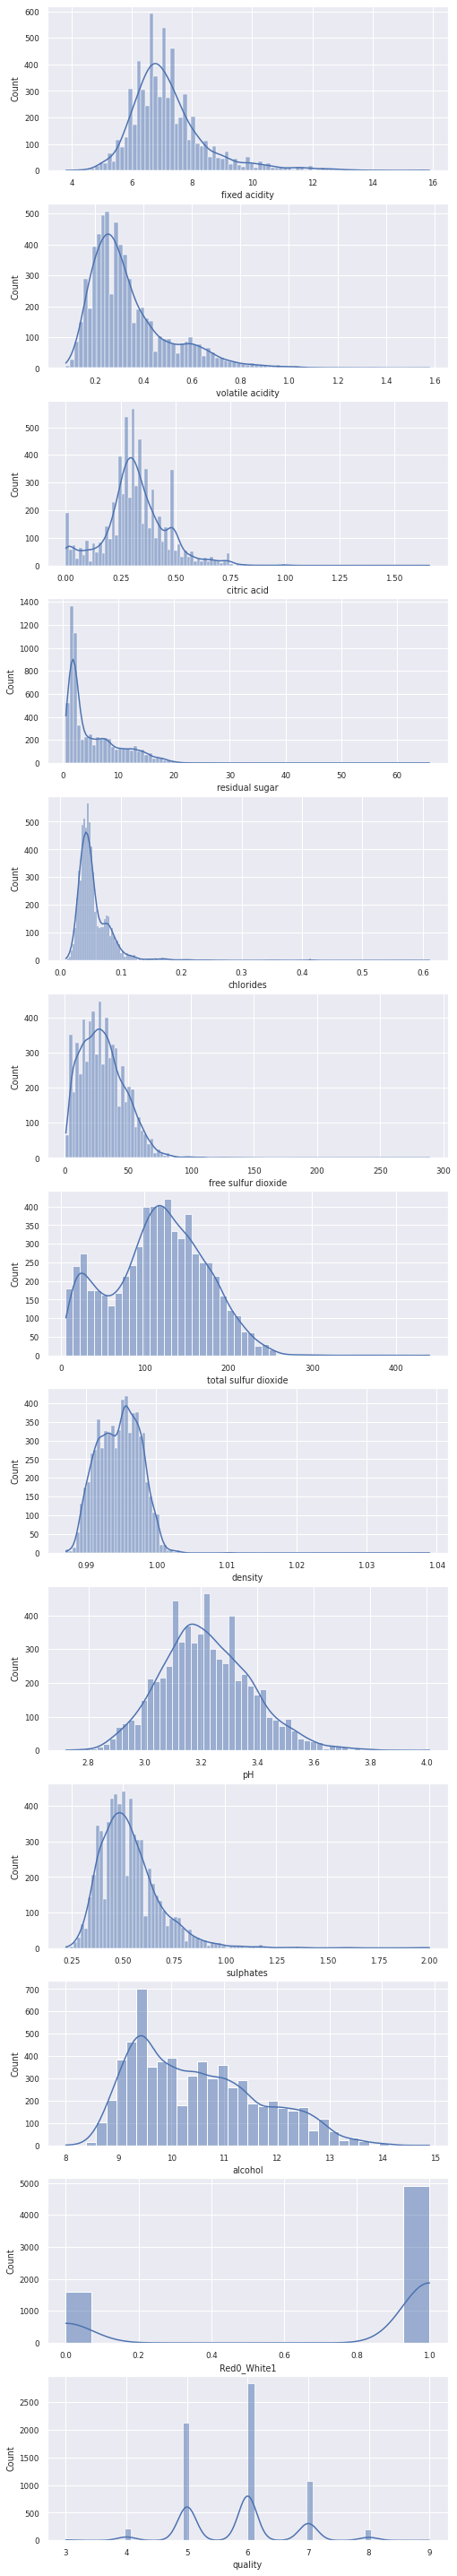

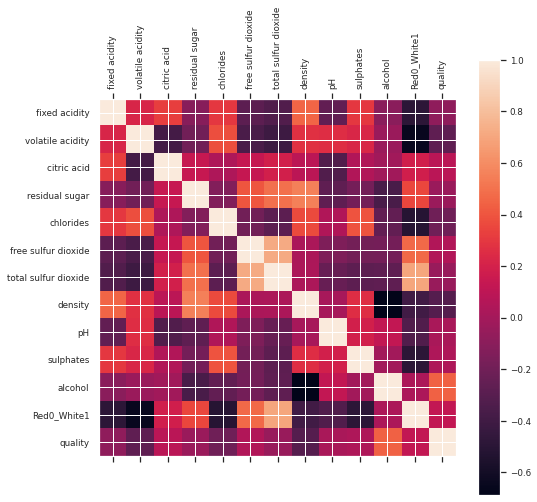

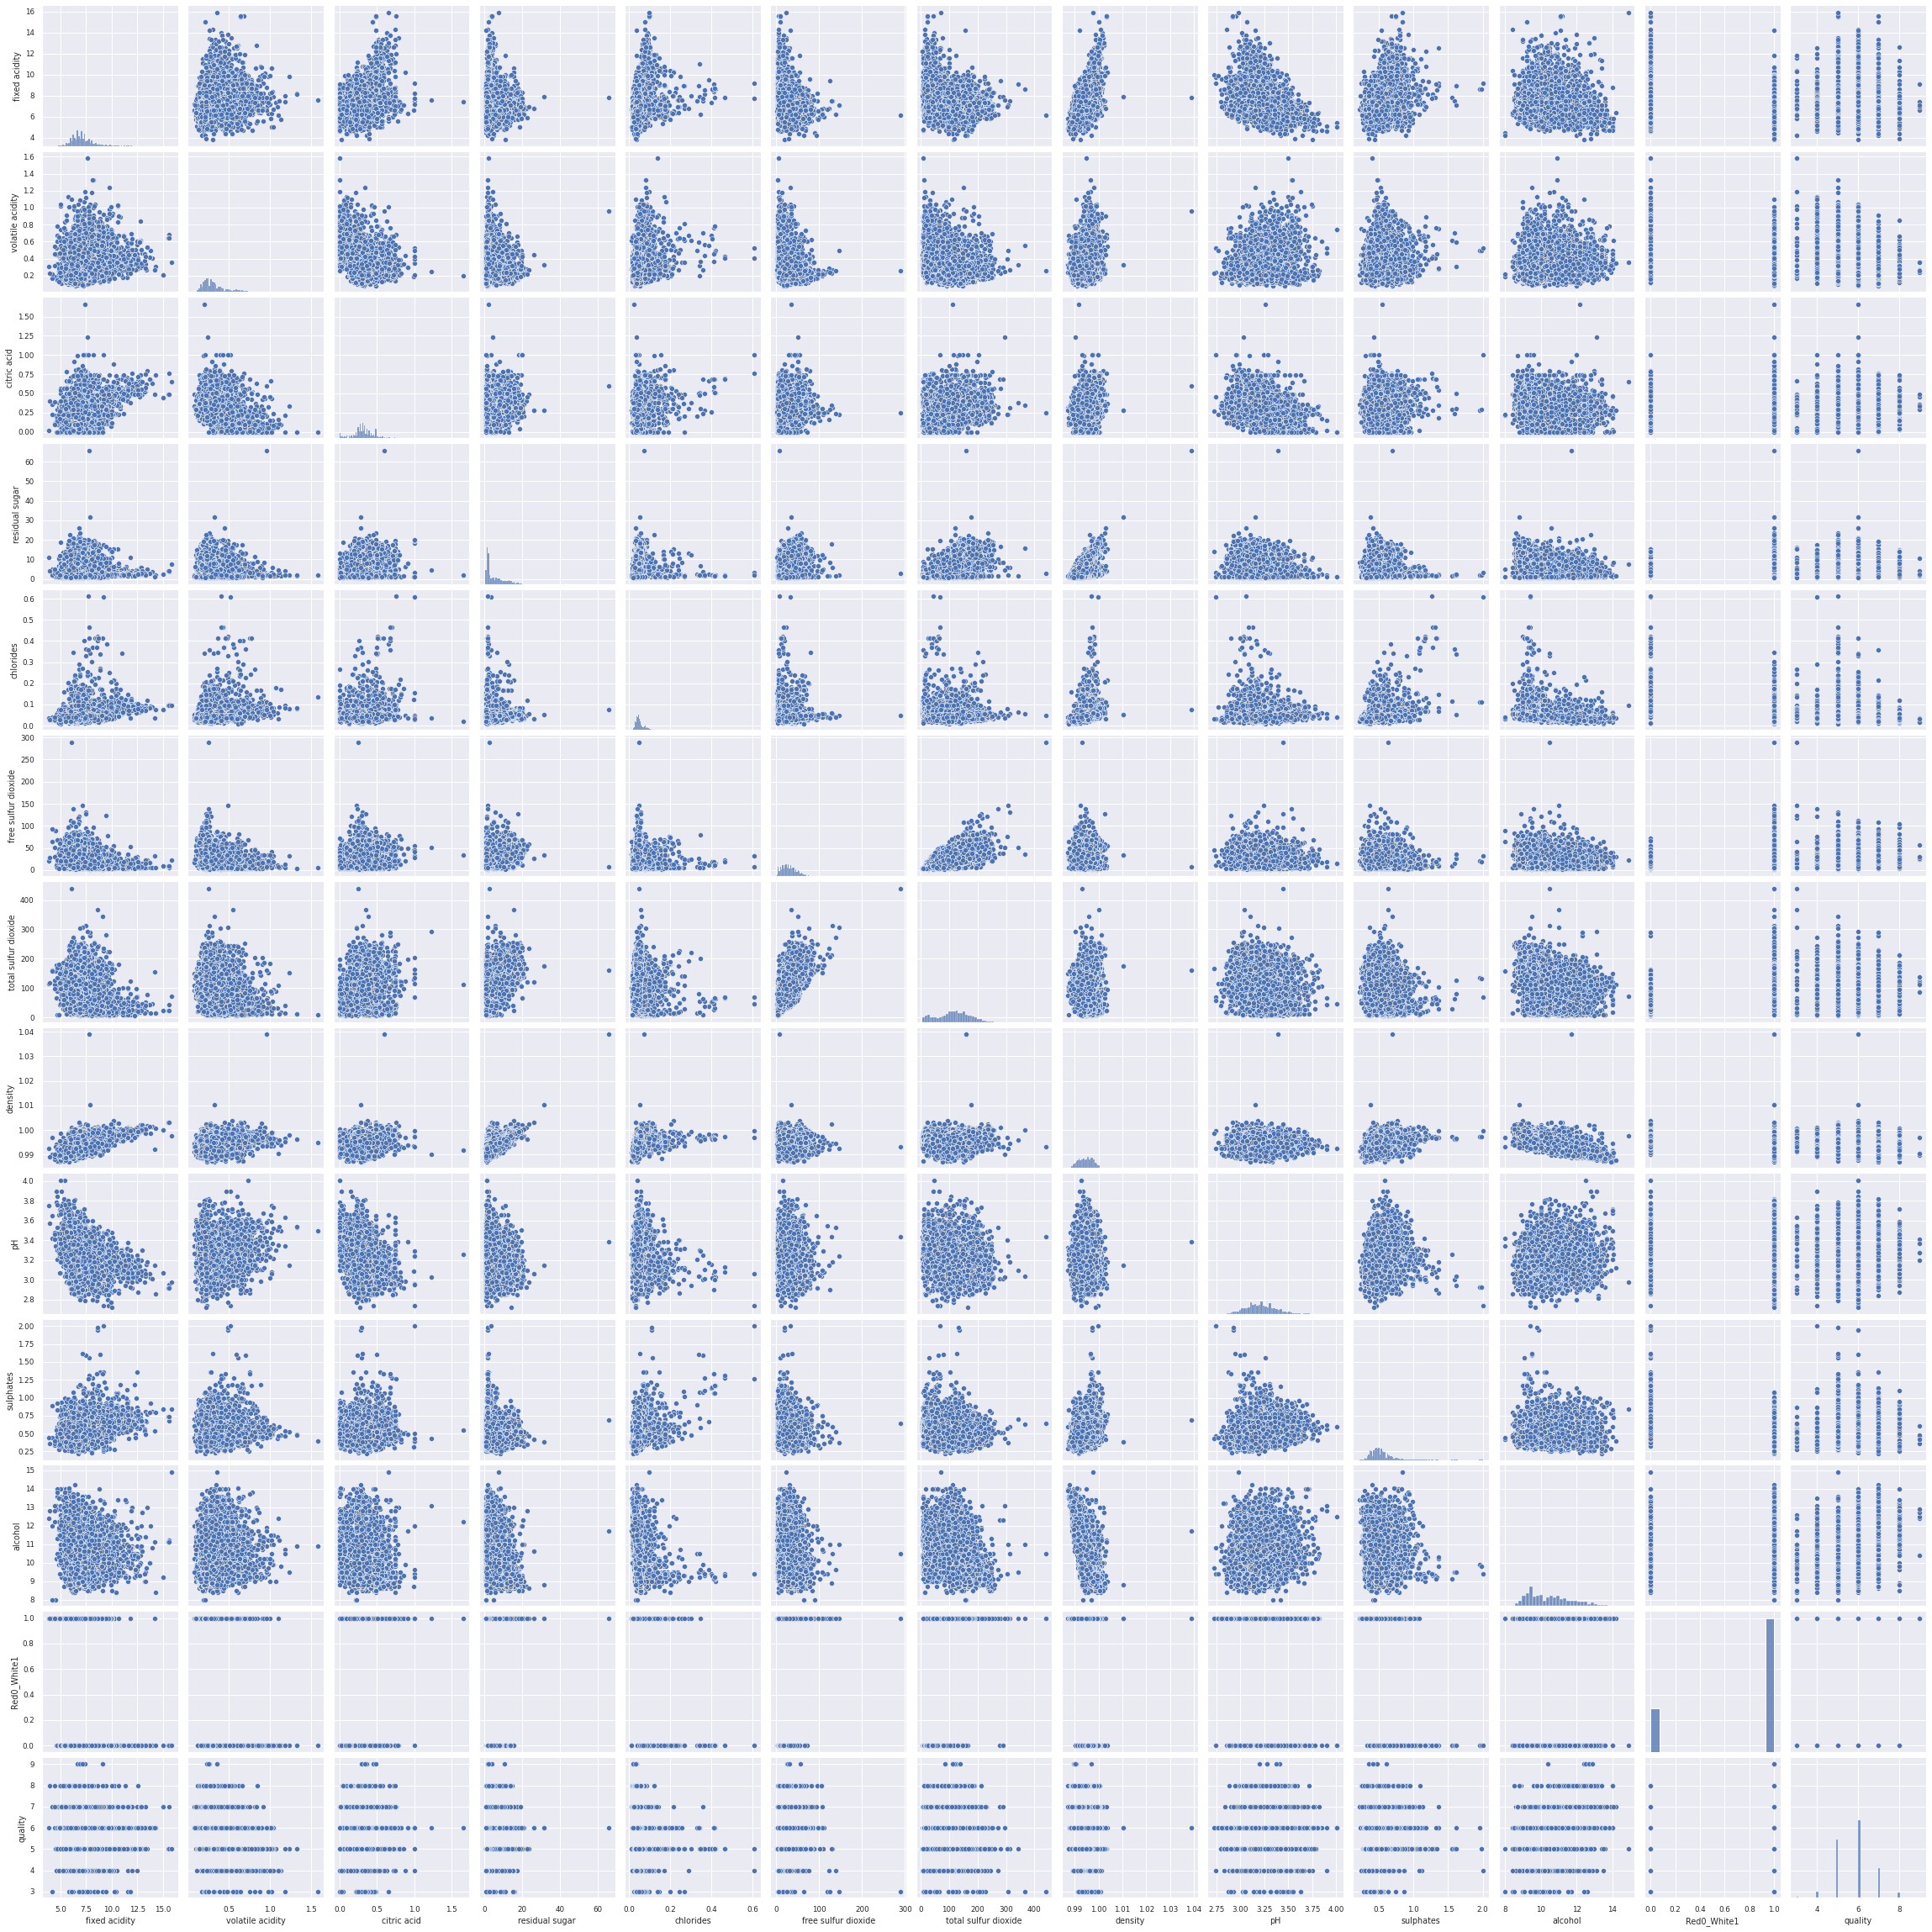

In [ ]:
explore_data(wine_df)

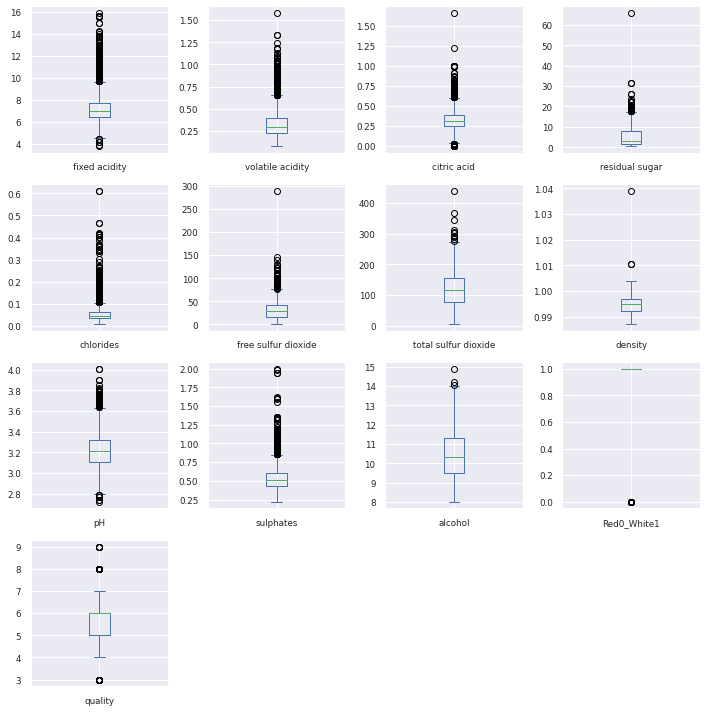

In [ ]:
wine_df.plot(kind='box',subplots=True,layout=(4,4),grid=True,figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
# Create a list of all variables except 'quality'
variable_list = list(wine_df.columns[:-1])

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Variable', 'T-Statistic', 'P-Value'])

# Perform t-tests for each variable against 'quality'
for variable in variable_list:
    group1 = wine_df[wine_df['quality'] < 6][variable]
    group2 = wine_df[wine_df['quality'] >= 6][variable]
    t_stat, p_value = ttest_ind(group1, group2)
    results_df = results_df.append({'Variable': variable,
                                    'T-Statistic': round(t_stat,4),
                                    'P-Value': round(p_value,4)}, ignore_index=True)

# Display the results dataframe
print(results_df)

                Variable  T-Statistic  P-Value
0          fixed acidity       5.4405   0.0000
1       volatile acidity      22.3327   0.0000
2            citric acid      -6.1215   0.0000
3         residual sugar       2.6193   0.0088
4              chlorides      14.9090   0.0000
5    free sulfur dioxide      -3.6157   0.0003
6   total sulfur dioxide       3.8393   0.0001
7                density      22.4976   0.0000
8                     pH      -1.5188   0.1289
9              sulphates      -2.8876   0.0039
10               alcohol     -34.6178   0.0000
11           Red0_White1      -9.4611   0.0000


# Functions

In [ ]:
def export_to_csv(df, file_path):
    """
    Export a pandas DataFrame to a CSV file.

    Parameters:
    - df: pandas DataFrame to export.
    - file_path: file path to save the CSV file.

    Returns:
    - None
    """
    try:
        df.to_csv(file_path, index=False)
        print(f"{len(df)} rows exported to {file_path}")
    except Exception as e:
        print(f"Error exporting to {file_path}: {e}")

In [ ]:
#df = pd.read_csv("path_to_file.csv")
#perform_eda(df)

In [ ]:
def t_test_p_value(dataframe, target_column):
    """
    Perform a t-test and calculate the p-value for each feature against the target column in a pandas dataframe.
    
    Parameters:
    dataframe (pd.DataFrame): The dataframe to perform the t-test on.
    target_column (str): The name of the target column to use in the t-test.
    
    Returns:
    dict: A dictionary of t-statistics and p-values for each feature against the target column.
    """
    
    # Create an empty dictionary to store the results
    results = {}
    
    # Iterate over each column in the dataframe
    for column in dataframe.columns:
        if column != target_column:
            # Perform a t-test between the current column and the target column
            t_stat, p_value = stats.ttest_ind(dataframe[column], dataframe[target_column], equal_var=False)
            
            # Store the t-statistic and p-value in the results dictionary
            results[column] = {"t-statistic": round(t_stat,3), "p-value": round(p_value,3)}
    
    # Return the results dictionary
    return results

In [ ]:
#df = pd.read_csv("path_to_file.csv")
#ttest_results = perform_ttest(df, "target_column")

In [ ]:
def preprocess_df(df, target_col, test_size=0.2, random_state=0):
    """
    Preprocesses a pandas dataframe by standard scaling the features and splitting
    the data into training and test sets using cross validation.

    Parameters:
        df (pd.DataFrame): The input dataframe to be preprocessed.
        target_col (str): The name of the target column in the dataframe.
        test_size (float, optional): The size of the test set as a fraction of the data. Default is 0.2.
        random_state (int, optional): The seed for the random number generator used in train_test_split. Default is 0.

    Returns:
        X_train (np.array): The preprocessed training set features.
        X_test (np.array): The preprocessed test set features.
        y_train (np.array): The training set target values.
        y_test (np.array): The test set target values.
    """
    # Separate the target column from the features
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Save the training and test sets as separate CSV files
    pd.DataFrame(X_train, columns=df.drop(columns=[target_col]).columns).to_csv("train_features.csv", index=False)
    pd.DataFrame(X_test, columns=df.drop(columns=[target_col]).columns).to_csv("test_features.csv", index=False)
    pd.DataFrame(y_train, columns=[target_col]).to_csv("train_target.csv", index=False)
    pd.DataFrame(y_test, columns=[target_col]).to_csv("test_target.csv", index=False)

    return X_train, X_test, y_train, y_test

In [ ]:
def best_model(X_train, X_test, y_train, y_test, target_col):
    """
    X_train:
    X_test:
    y_train: 
    y_test:
    target_col: Target column
    """

    # Initialize a list of classifiers
    classifiers = [LogisticRegression(), 
                   KNeighborsClassifier(), 
                   DecisionTreeClassifier(), 
                   RandomForestClassifier(), 
                   SVC(), 
                   GaussianNB()]
    
    # Initialize a list to store the accuracy scores
    classifier = []
    scores = []
    pred = []

    
    # Loop over each classifier and fit the model to the training data
    for clf in classifiers:
        model_name = type(clf).__name__
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = round(accuracy_score(y_test, y_pred),3)
        scores.append(score)
        classifier.append(model_name)
        pred.append(y_pred)

    # Output Classifier table
    model_scores = pd.DataFrame(
         {'Model': classifier,
          'Score': scores   
         }) 
    model_scores = model_scores.sort_values(by='Score', ascending=False).reset_index()


    
    # Find the index of the classifier with the highest accuracy score
    best_index = np.argmax(scores)
    
    # Return the classifier with the highest accuracy score
    return print('Best Classifier is: ', classifiers[best_index],'\n\n', model_scores), pred

In [ ]:
def grid_search_rfc(X_train, y_train, param_grid, cv=5):
    """
    Performs a grid search on a random forest classifier using scikit-learn's GridSearchCV.

    Parameters:
        X_train (np.array): The training set features.
        y_train (np.array): The training set target values.
        param_grid (dict): The grid of hyperparameters to search over.
        cv (int, optional): The number of cross-validation folds. Default is 5.

    Returns:
        scores (list): A list of mean cross-validation scores for each hyperparameter combination.
    """
    rfc = RandomForestClassifier()
    grid_search = GridSearchCV(rfc, param_grid, cv=cv)
    grid_search.fit(X_train, y_train)

    scores = grid_search.cv_results_['mean_test_score']

    return scores

In [ ]:
def remove_outliers(df):
    """
    Removes rows with outliers in any column except the last one.

    Parameters:
        df (pd.DataFrame): The input dataframe to be processed.

    Returns:
        df_clean (pd.DataFrame): The cleaned dataframe with outliers removed.
    """
    df_clean = df.copy()
    cols = df.columns[:-1] # exclude the last column
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Split Train/Test dataset

In [ ]:
X_train, X_test, y_train, y_test = preprocess_df(wine_df, 'quality', test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5197, 12) (1300, 12) (5197,) (1300,)


In [ ]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Red0_White1', 'quality'],
      dtype='object')

# Test Functions

In [ ]:
#export_to_csv(df=wine_df, file_path='wine_df.csv')


In [ ]:
#X_train, X_test, y_train, y_test = preprocess_df(wine_df, 'quality', test_size=0.2, random_state=0)

In [ ]:
"""print(X_train.shape,
X_test.shape,
y_train.shape ,
y_test.shape)
"""

'print(X_train.shape,\nX_test.shape,\ny_train.shape ,\ny_test.shape)\n'

In [ ]:
t_test_p_value(wine_df, 'quality')

{'fixed acidity': {'t-statistic': 72.035, 'p-value': 0.0},
 'volatile acidity': {'t-statistic': -496.946, 'p-value': 0.0},
 'citric acid': {'t-statistic': -500.756, 'p-value': 0.0},
 'residual sugar': {'t-statistic': -6.251, 'p-value': 0.0},
 'chlorides': {'t-statistic': -531.453, 'p-value': 0.0},
 'free sulfur dioxide': {'t-statistic': 112.064, 'p-value': 0.0},
 'total sulfur dioxide': {'t-statistic': 156.743, 'p-value': 0.0},
 'density': {'t-statistic': -445.237, 'p-value': 0.0},
 'pH': {'t-statistic': -236.009, 'p-value': 0.0},
 'sulphates': {'t-statistic': -481.081, 'p-value': 0.0},
 'alcohol': {'t-statistic': 254.831, 'p-value': 0.0},
 'Red0_White1': {'t-statistic': -419.232, 'p-value': 0.0}}

# Models

## Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# Mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Mean absolute deviation
print('Mean absolute deviation: %.2f' % mean_absolute_error(y_test, y_pred))

# Coefficient of determination (R-squared)
print('Coefficient of determination (R-squared): %.2f' % r2_score(y_test, y_pred))



Mean squared error: 0.55
Mean absolute deviation: 0.58
Coefficient of determination (R-squared): 0.30


## Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Create an SVM regression model
svm_reg = svm.SVR(kernel='linear')

# Train the model using the training data
svm_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_reg.predict(X_test)

# Coefficient of determination (R-squared)
print('Coefficient of determination (R-squared): %.2f' % r2_score(y_test, y_pred))

# Calculate mean absolute deviation (MAD)
mad = mean_absolute_error(y_test, y_pred)
print('MAD:', mad)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

Coefficient of determination (R-squared): 0.29
MAD: 0.5824414168231321
MSE: 0.5480337377768616


# Models + Histogram by taking out outliers

In [ ]:
wine_df_clean = remove_outliers(wine_df)

In [ ]:
wine_df_clean.shape

(4336, 13)

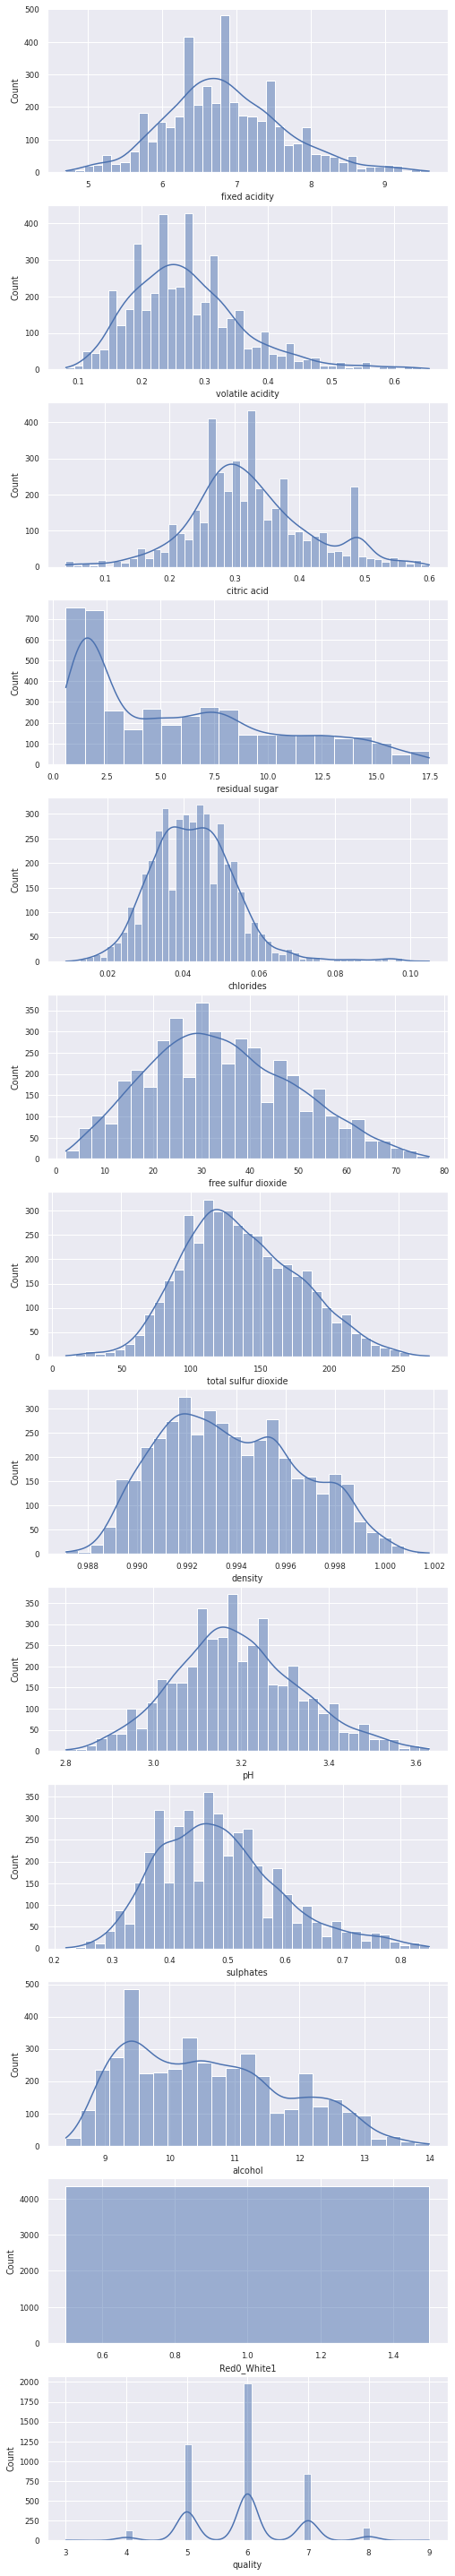

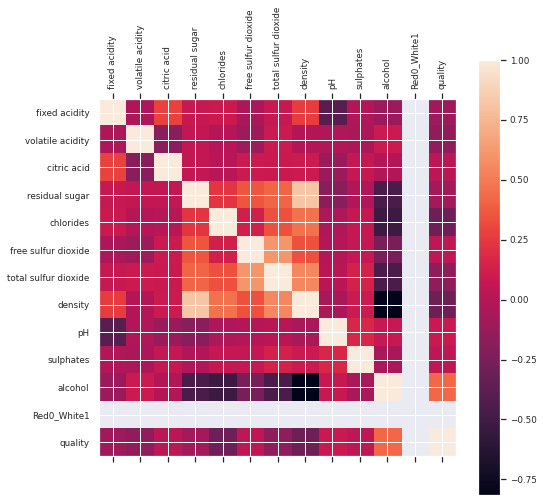

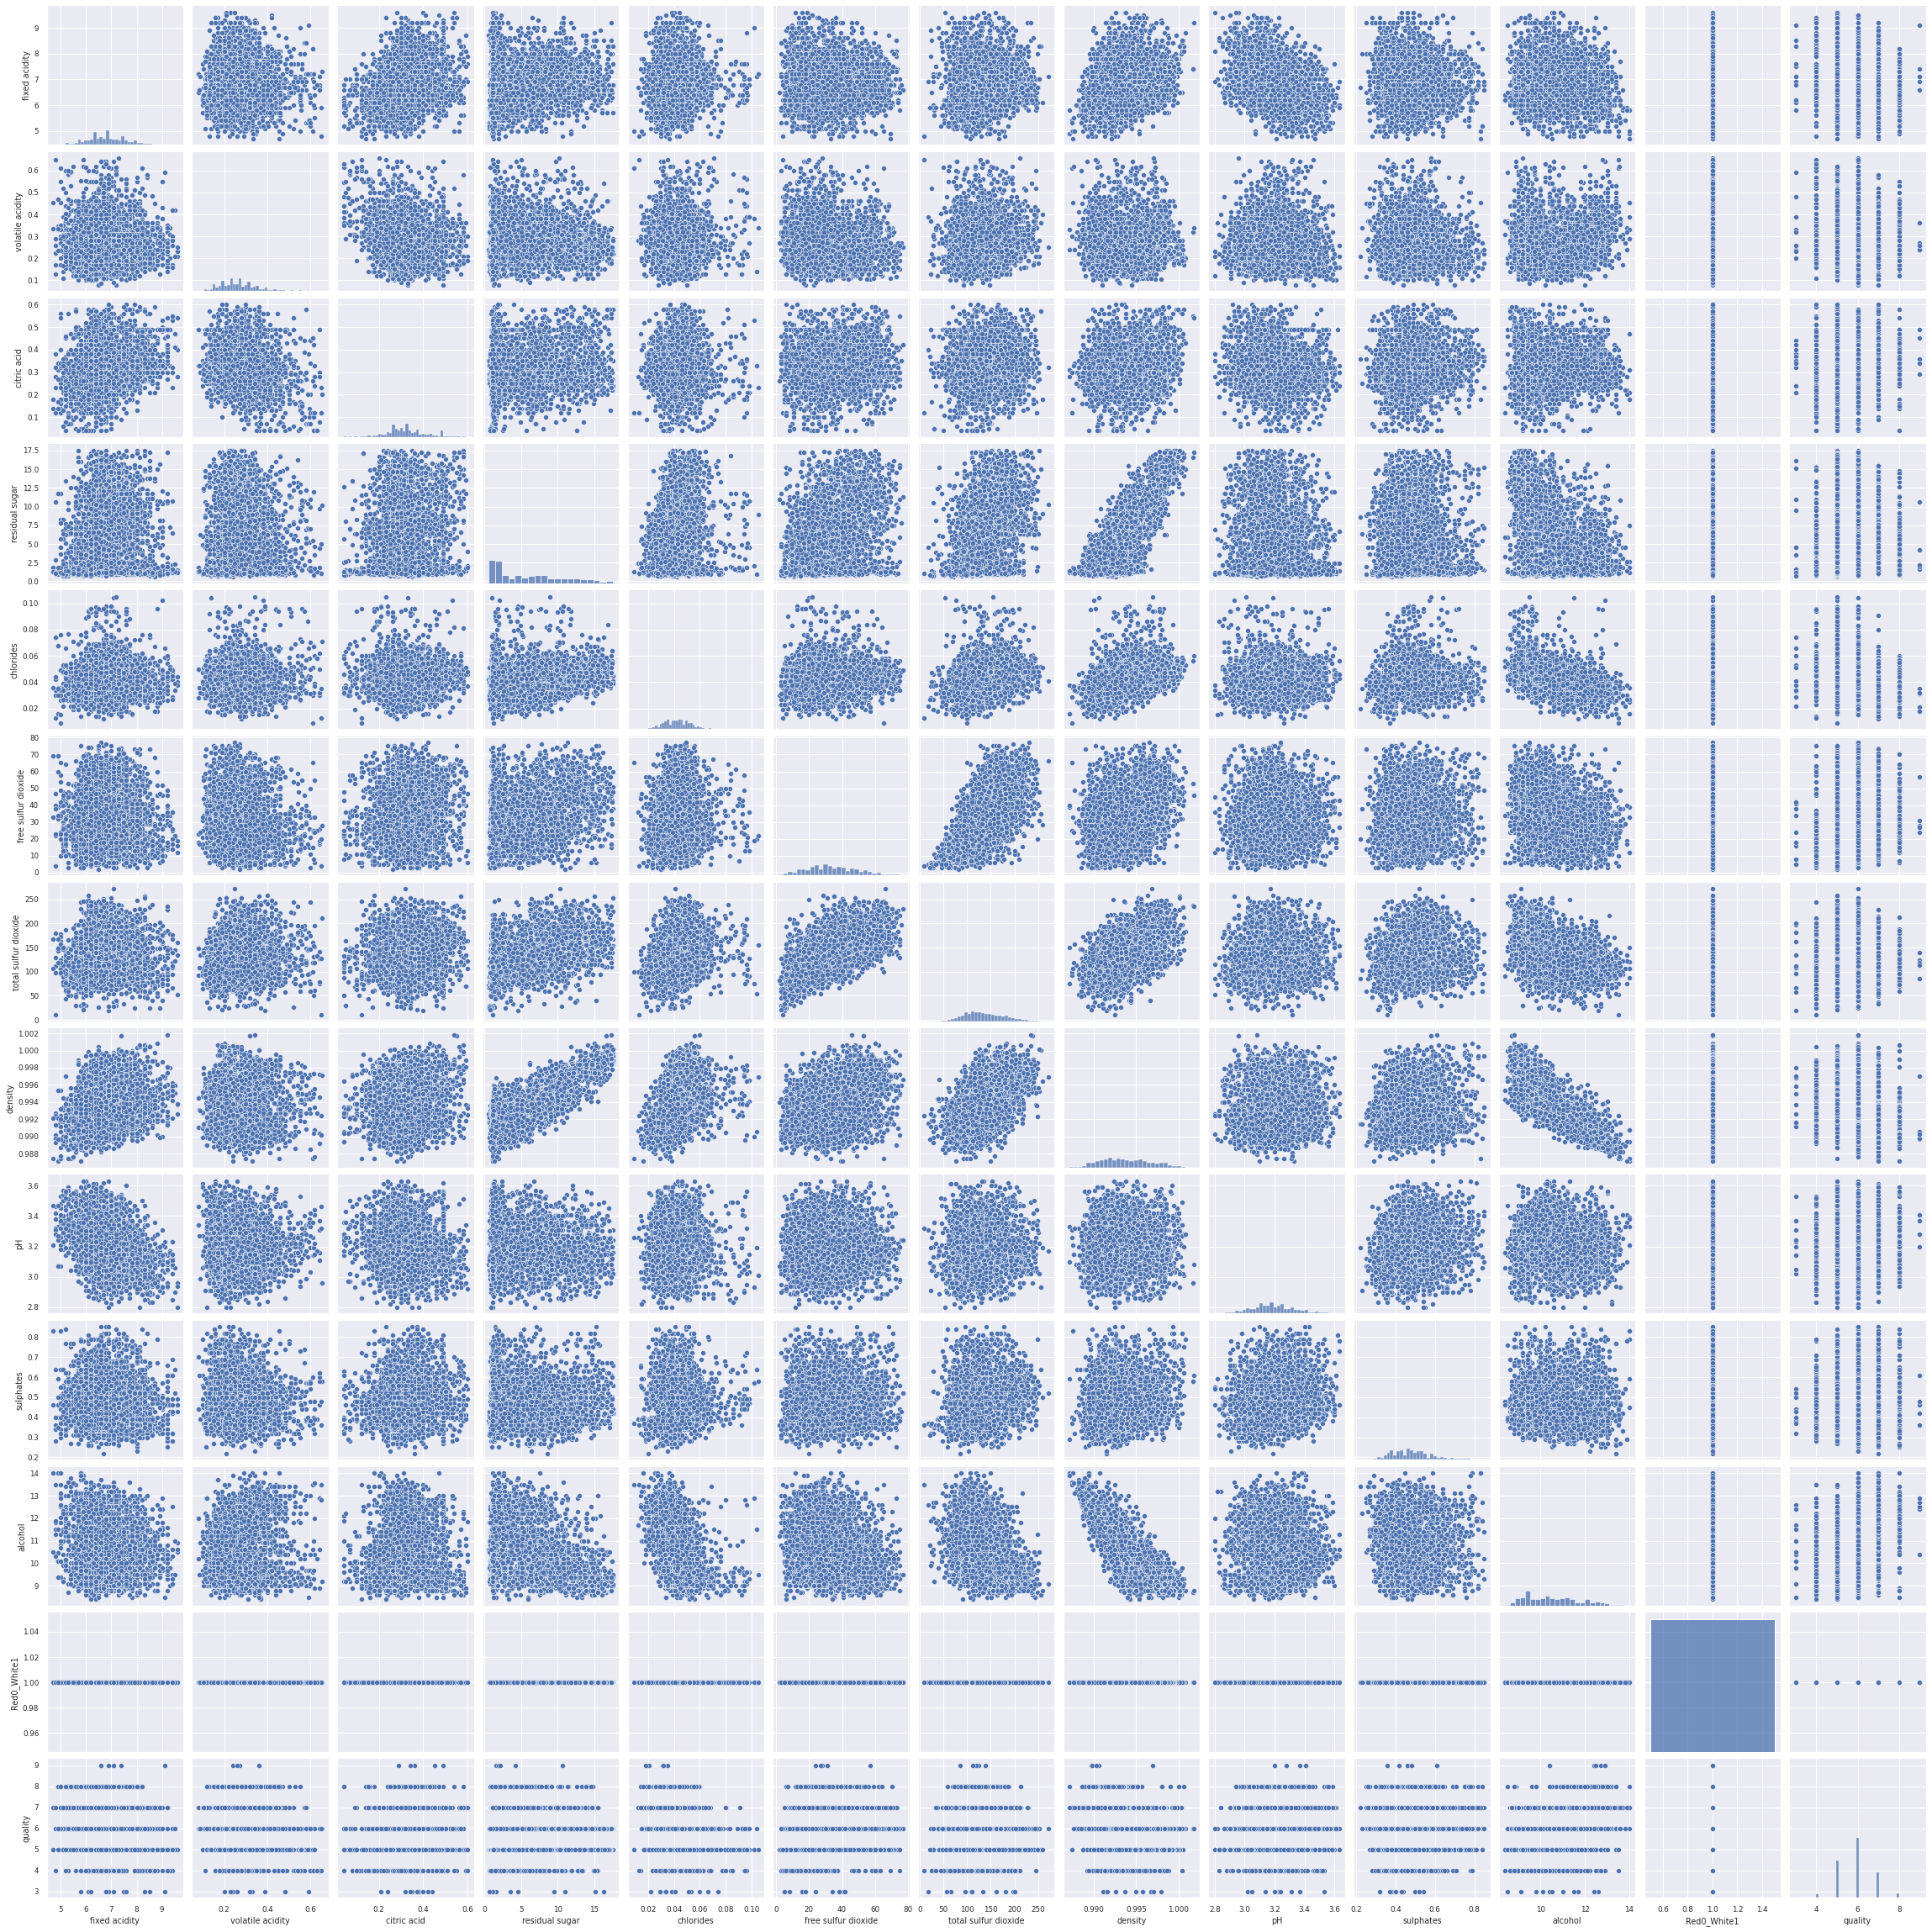

In [ ]:
explore_data(wine_df_clean)

In [ ]:
X_train, X_test, y_train, y_test = preprocess_df(wine_df_clean, 'quality', test_size=0.2, random_state=0)

### Linear Regression

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# Mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Mean absolute deviation
print('Mean absolute deviation: %.2f' % mean_absolute_error(y_test, y_pred))

# Coefficient of determination (R-squared)
print('Coefficient of determination (R-squared): %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.54
Mean absolute deviation: 0.57
Coefficient of determination (R-squared): 0.26


### SVM

In [ ]:
# Create an SVM regression model
svm_reg = svm.SVR(kernel='linear')

# Train the model using the training data
svm_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_reg.predict(X_test)

# Coefficient of determination (R-squared)
print('Coefficient of determination (R-squared): %.2f' % r2_score(y_test, y_pred))

# Calculate mean absolute deviation (MAD)
mad = mean_absolute_error(y_test, y_pred)
print('MAD:', mad)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

Coefficient of determination (R-squared): 0.25
MAD: 0.5715594777182604
MSE: 0.546419924625624
